### Import some jupyter spesific modules

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

### Import some necessary modules

In [2]:
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D

### Import data from Data Pool Class

In [41]:
from itb_data_pool import ITBDataPool
datpol = ITBDataPool()

print((' '.join(datpol.All_Vars[0:2]).replace('self.', '')))
print((' '.join(datpol.All_Vars[2:6]).replace('self.', '')))
print((' '.join(datpol.All_Vars[6:9]).replace('self.', '')))
print('\n')
print((' '.join(datpol.All_Vars[9:13]).replace('self.', '')))
print((' '.join(datpol.All_Vars[13:17]).replace('self.', '')))
print('\n')
print((' '.join(datpol.All_Vars[17:21]).replace('self.', '')))
print((' '.join(datpol.All_Vars[21:25]).replace('self.', '')))
print('\n')
print((' '.join(datpol.All_Vars[25:29]).replace('self.', '')))
print((' '.join(datpol.All_Vars[29:33]).replace('self.', '')))

NoUnitNoHP_Second NoUnitNoHP_Data
NoUnitMiniso_Second NoUnitMiniso_Data NoUnitBose_Second NoUnitBose_Data
Ukur_Freq Ukur_OutUp Ukur_OutDown


Day1_Bose1_Up Day1_Bose1_Down Day1_Bose2_Up Day1_Bose2_Down
Day1_Miniso1_Up Day1_Miniso1_Down Day1_Miniso2_Up Day1_Miniso2_Down


Day2_Bose1_Up Day2_Bose1_Down Day2_Bose2_Up Day2_Bose2_Down
Day2_Miniso1_Up Day2_Miniso1_Down Day2_Miniso2_Up Day2_Miniso2_Down


Day3_Bose1_Up Day3_Bose1_Down Day3_Bose2_Up Day3_Bose2_Down
Day3_Miniso1_Up Day3_Miniso1_Down Day3_Miniso2_Up Day3_Miniso2_Down


### Plot 3D in dB [SPL] function

In [4]:
def PlotSPL3D(xlabel, ydata, zdata):
    Xlabel = xlabel
    Xtick = np.arange(len(Xlabel))
    X = Xtick
    Y = ydata
    Z = zdata

    X, Y = np.meshgrid(X,Y)

    fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    ax.set_xticks(Xtick.tolist())
    ax.set_xticklabels(Xlabel,rotation=90)
    #ax.set_xlabel('Frequency')
    ax.set_ylabel('Seconds')
    ax.set_zlabel('dB [SPL]')
    ax.set_zlim(0,110)
    fig.colorbar(surf, shrink=0.3, aspect=5)
    plt.show()

### Plot point in dB [SPL]

In [5]:
def PlotSPLPoint(xdata,ydata,judul='grafik'):
    fig = plt.figure(figsize=(4,4), dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(xdata, ydata, '-o', label=judul)
    plt.xticks(xdata)
    plt.xlabel('Out Scale')
    plt.ylabel('SPL (dB)')
    plt.ylim(0, 110)
    plt.legend(loc='best')
    plt.show()

### Plot 2 groups of data

In [6]:
def PlotSPLGroup(xdata, y0a, y0b, y0c, label0, y1a, y1b, y1c, label1, yrange):
    fig = plt.figure(figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')

    plt.plot(xdata, y0a, '-ro', label=label0)
    plt.plot(xdata, y0b, '-ro')
    plt.plot(xdata, y0b, '-ro')
        
    plt.plot(xdata, y1a, '-bo', label=label1)
    plt.plot(xdata, y1b, '-bo')
    plt.plot(xdata, y1b, '-bo')

    plt.xticks(datpol.Ukur_Freq)
    plt.xlabel('freq Hz')
    plt.ylabel('SPL (dB)')
    plt.ylim(yrange[0], yrange[1])
    plt.legend(loc='lower right')
    plt.show()

----------------------------------------------------------------------------------------------------------

### Ground Data Tanpa Prototype and Tanpa Headphone

Showing only Left channel since can represent of Right channel

#### Komentar

Jika satuan data adalah dB [SPL], maka data dasar mencapai di atas 40 dB akan terasa aneh untuk suatu _un-echoic chamber_, kecuali ada pengaturan tertentu dan pembobotan khusus yang perlu dikonfirmasi kembali.

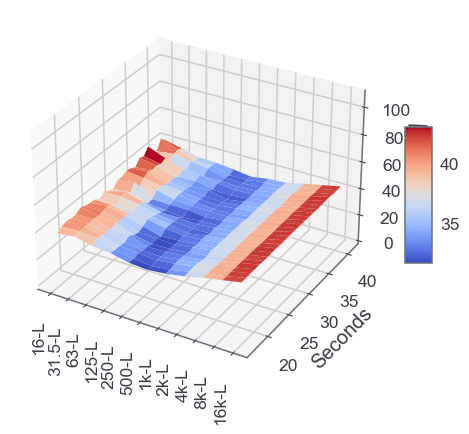

In [7]:
PlotSPL3D(
    datpol.Octave_FreqStr[0::2], #Take Left Only
    datpol.NoUnitNoHP_Second,
    datpol.NoUnitNoHP_Data[:,0::2]) #Take Left Only

### Ground Data Headphone Miniso tanpa Prototype


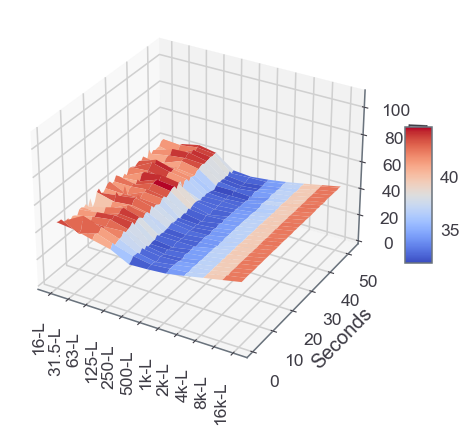

In [8]:
PlotSPL3D(
    datpol.Octave_FreqStr[0::2], #Take Left Only
    datpol.NoUnitMiniso_Second,
    datpol.NoUnitMiniso_Data[:,0::2]) #Take Left Only

### Ground Data Headphone BOSE tanpa Prototype

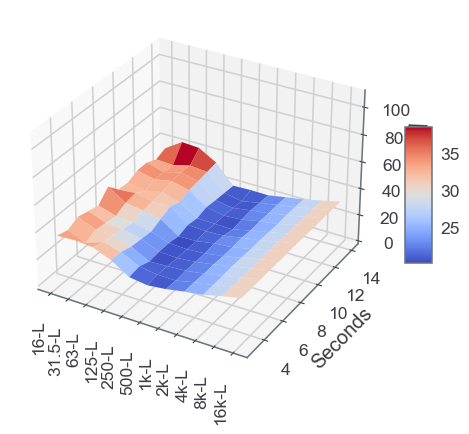

In [9]:
PlotSPL3D(
    datpol.Octave_FreqStr[0::2], #Take Left Only
    datpol.NoUnitBose_Second,
    datpol.NoUnitBose_Data[:,0::2]) #Take Left Only

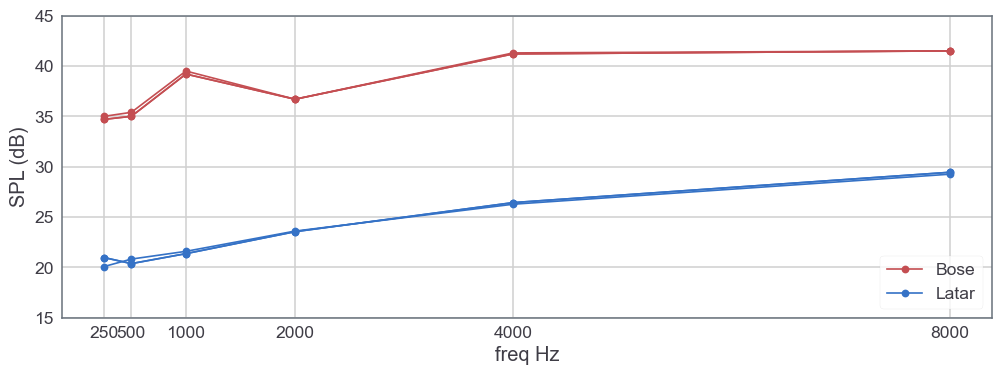

In [10]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Bose1_Up[0,:,0], datpol.Day1_Bose1_Up[1,:,0], datpol.Day1_Bose1_Up[2,:,0], 'Bose',
             datpol.NoUnitBose_Data[2,8:20:2], datpol.NoUnitBose_Data[4,8:20:2], datpol.NoUnitBose_Data[6,8:20:2], 'Latar', [15,45])

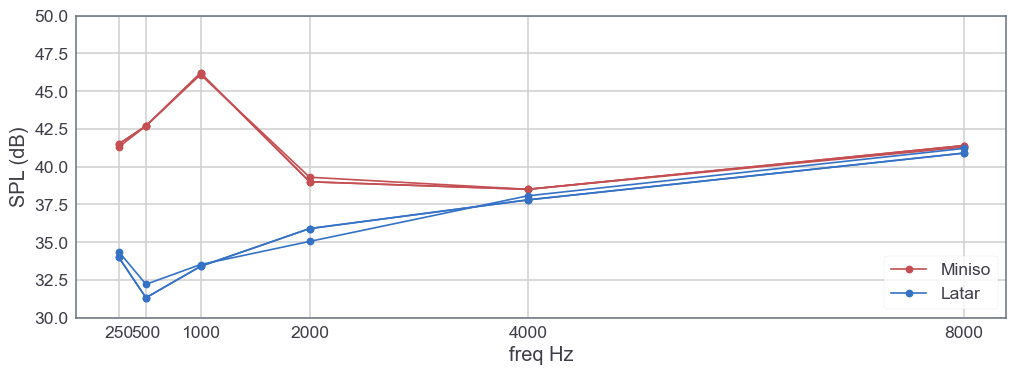

In [11]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Miniso1_Up[0,:,0], datpol.Day1_Miniso1_Up[1,:,0], datpol.Day1_Miniso1_Up[2,:,0], 'Miniso',
            datpol.NoUnitMiniso_Data[2,8:20:2], datpol.NoUnitMiniso_Data[4,8:20:2], datpol.NoUnitMiniso_Data[6,8:20:2], 'Latar', [30, 50])

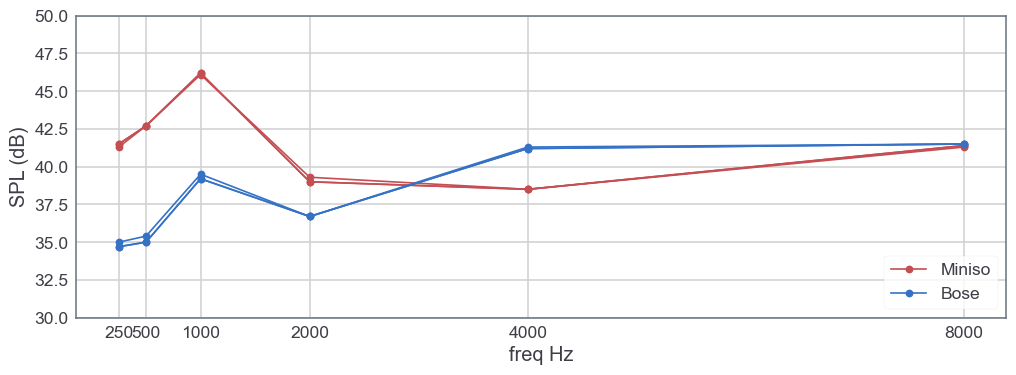

In [12]:
PlotSPLGroup(datpol.Ukur_Freq, datpol.Day1_Miniso1_Up[0,:,0], datpol.Day1_Miniso1_Up[1,:,0], datpol.Day1_Miniso1_Up[2,:,0], 'Miniso',
            datpol.Day1_Bose1_Up[0,:,0], datpol.Day1_Bose1_Up[1,:,0], datpol.Day1_Bose1_Up[2,:,0], 'Bose', [30,50])